# Low $t$-limit
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from numba import njit
import palettable as pl
emr = pl.cartocolors.sequential.Emrld_7_r.get_mpl_colormap()
plt.style.use('Solarize_Light2')
from time import time

In [2]:
from mon_jasnow import get_tau

In [4]:
Tc = 2 /(np.log(1+np.sqrt(2)))          # Tc
N_list =np.arange(10, 32, dtype=int)    # N-values to check 
N_points =20                            # Number of Temperature points to check
T = np.linspace(0.8*Tc, Tc, N_points)   # Temperature point list
N_sweeps = 1000000                      
N_runs = 1
skips = 3

In [ ]:
# # Runs and saves many simulations

# a0 = time()
# for N in N_list:
#     a = time()
#     tau = get_tau(N, N_sweeps, T, N_runs, skips, bc='torus')
#     b = time()
#     np.save(f"tau/N{N}_Sweeps{N_sweeps}_skips{skips}", [tau, T, N_list])
#     print(f"N: {N}")
#     print(f"Time for current: {b-a}s")
#     print(f"Total time: {b-a0}s")

In [215]:
matrix = np.zeros((N_list.shape[0], T.shape[0]))

In [5]:
ta = [] # Tau placeholder list
for i,N in enumerate(N_list):
    try:
        tau,_, _ = np.load(f"tau/N{N}_Sweeps{N_sweeps}_skips{skips}.npy", allow_pickle=True)
        ta.append(tau)
    except:
        pass

In [6]:
matrix = np.zeros((len(ta), T.shape[0])) # create matrix with correct dimension

In [7]:
for i,tt in enumerate(ta):
    matrix[i,:] = tt     

In [8]:
t = (Tc- T)/Tc # Create reduced temperature list

# Tau-scaling
---

In [59]:
n = N_list[:len(ta)]
tau_aa = matrix[:,-1]
cfs = np.polyfit(np.log(n[tau_aa>0.09]), np.log(tau_aa[tau_aa>0.09]), deg = 1)
poly = np.poly1d(cfs)
cfs #  array([-0.27033959, -0.91614073])

array([-0.27033959, -0.91614073])

In [74]:
np.exp(poly(np.log(n)))

array([0.21467702, 0.20921628, 0.20435239, 0.19997797, 0.19601141,
       0.19238939, 0.18906182, 0.1859885 , 0.18313666, 0.18047931,
       0.17799394, 0.17566163, 0.17346631])

Text(0.5, 0, '$N$')

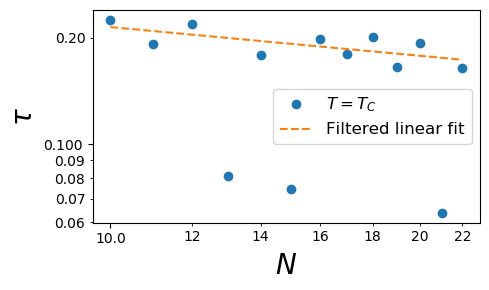

In [77]:
import matplotlib
plt.style.use('default')
fig= plt.figure(figsize=(5, 3), tight_layout=True)
plt.loglog(N_list[:len(ta)], matrix[:,-1], 'o', label=fr"$T = T_C$")
plt.plot(n, np.exp(poly(np.log(n))), '--', label="Filtered linear fit")
# ax.set_yscale('log')
# ax.set_xscale('log')
# plt.grid()
plt.legend(fontsize=12)
plt.gca().get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_xaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.gca().get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
plt.ylabel(fr"$\tau$", size=20)
plt.xlabel(fr"$N$", size=20)

# Linear fit
---

In [301]:
x = 1/(N_list[:len(ta)] * t[:-1,np.newaxis]).flatten() # Get all 1/Nt points
y = np.array([matrix[:,i]/t[i] for i in range(t.shape[0]-1)]).flatten() # Get all tau/t - points 

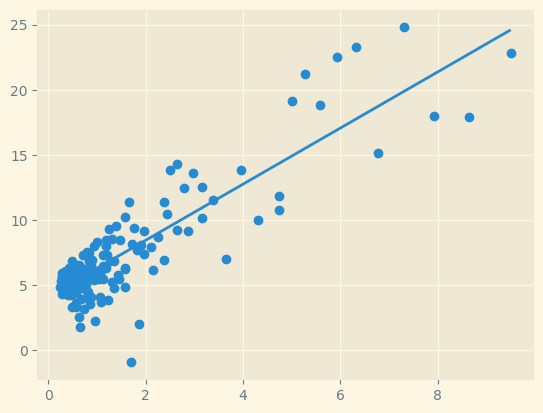

In [349]:
plt.scatter(x, y)
plt.plot(np.sort(x), poly(np.sort(x)))

In [347]:
coeffs = np.polyfit(x, y, deg=1) # Get coefficients of linear fit
poly = np.poly1d(coeffs) # create polynomial
poly(0) # Coefficient!   # Evaluate in 0 to obtain tau_0

4.132215516194312

In [348]:
x_plot = np.linspace(x.min(), x.max()) # Create values for plotting

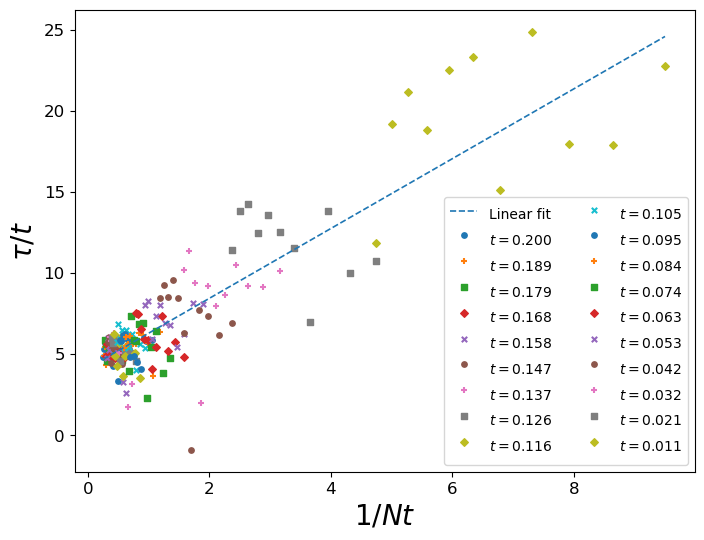

In [356]:
# Create plot.
# The equivalent of fig 5 can be obtained by removin "1/" in the x-argument of plt.scatter(), and uncommenting "ax.set_(xy)scale('log')"

import matplotlib
with plt.style.context('default'):
    plt.figure(figsize=(8, 6))
    markers = ["o" ,'+', "s" , "D", 'x']
    
    for i,t_ in enumerate(t[:-1:1]):
        tmp_tau = matrix[:,i]
        plt.scatter(1/(N_list[:len(ta)]*t_), tmp_tau / t_, marker= markers[i%len(markers)],label = fr"$t = {t_:.3f}$", s = 15)
    
    
    plt.plot(x_plot, poly(x_plot),'--', lw = 1.2, label = 'Linear fit')
    plt.legend(fontsize='medium', ncol=2,handleheight=2.4, labelspacing=0.05)
    plt.xlabel(fr"$ 1/ N t$", size=20)
    plt.ylabel(fr"$\tau / t$", size = 20)
    ax = plt.gca()
#     ax.set_yscale('log')
#     ax.set_xscale('log')
    ax.xaxis.set_tick_params(labelsize=12)
    ax.yaxis.set_tick_params(labelsize=12)